<a href="https://colab.research.google.com/github/Subham1100/Data_Analysis/blob/main/Clicked_Ad_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
advertising = pd.read_csv('Ad Click Data.csv')

In [3]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


In [4]:
advertising.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [5]:
advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


<Axes: >

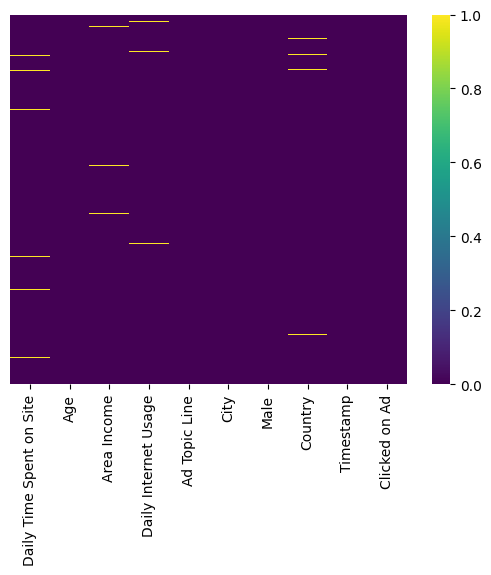

In [7]:
sns.heatmap(advertising.isnull(),yticklabels=False,cmap='viridis')

In [8]:
mean_area_income = advertising['Area Income'].mean()

In [9]:
def impute_area_income(cols):
  income = cols[0]

  if pd.isnull(income):
    return mean_area_income
  return income

advertising['Area Income'] = advertising[['Area Income']].apply(impute_area_income, axis=1)

<Axes: >

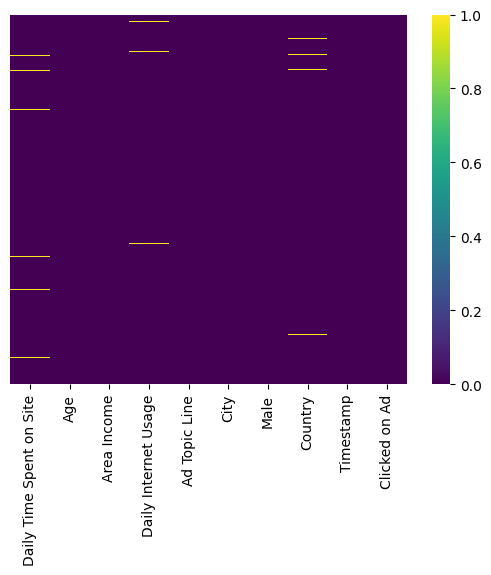

In [10]:
sns.heatmap(advertising.isnull(),yticklabels=False,cmap='viridis')

In [11]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


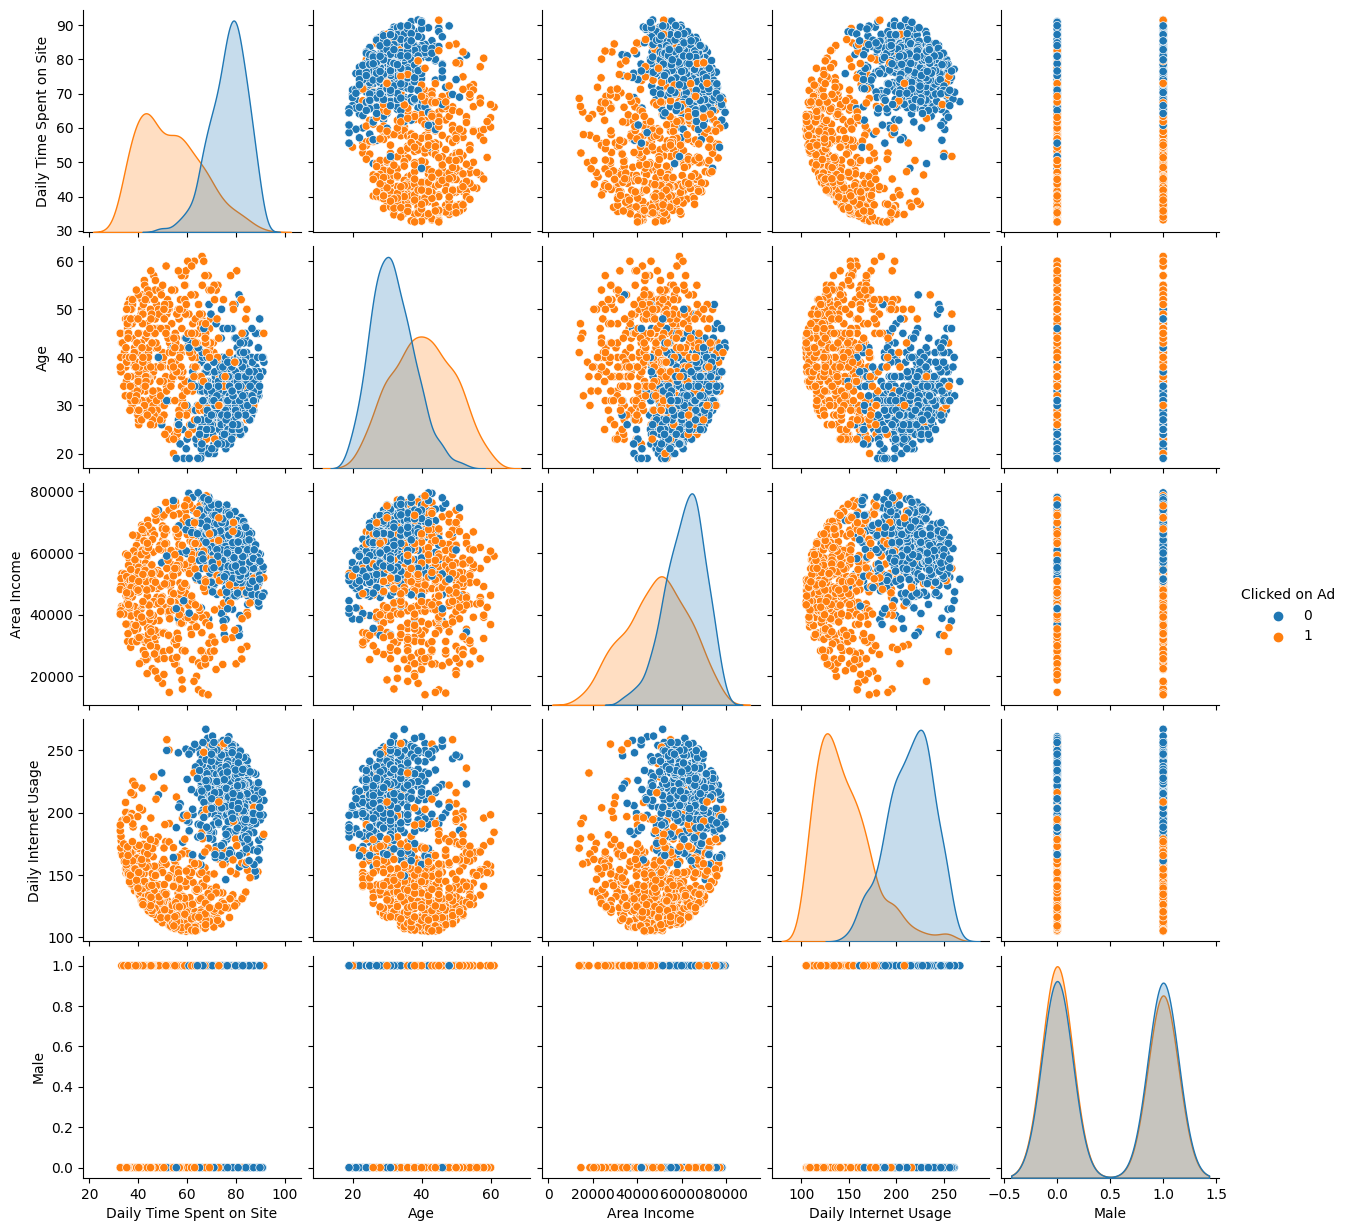

In [12]:
sns.pairplot(advertising,hue='Clicked on Ad')

In [17]:
advertising.dropna(inplace= True)
X = advertising[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
Y= advertising[['Clicked on Ad']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
from sklearn.metrics import classification_report
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       141
           1       0.89      0.95      0.92       149

    accuracy                           0.91       290
   macro avg       0.92      0.91      0.91       290
weighted avg       0.92      0.91      0.91       290

